### 라이브러리 로딩
- 나눔고딕 출처 https://hangeul.naver.com/font

In [510]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 
from matplotlib.ticker import ScalarFormatter

nanum_gothic = fm.FontProperties(fname='NanumGothic.ttf').get_name()
matplotlib.rc('font',family=nanum_gothic)

In [492]:
my_cmap = plt.get_cmap("coolwarm")
green_cmap = plt.get_cmap("Greens")
red_cmap = plt.get_cmap("Reds")
#magenta_cmap = plt.get_cmap("RdPu")
magenta_cmap = plt.get_cmap("PiYG")

def rescale_blue(y):
    y = np.array(y)
    P = y / -120
    N = y / np.min(y) / 1.2
    return (P/2+0.4) * (y>0) + (0.5+N/2) * (y<0)

def rescale_red(y):
    y = np.array(y) / 120
    return y + 0.5

def rescale_green(y):
    y = np.array(y) / 120
    return y

# def rescale_magenta(y):
#     y = np.array(y) / 150
#     return y

def rescale_magenta(y):
    y = np.array(y)
    P = y / -np.max(y)
    return P/2 + 0.3

#### 매해 1등 1인당 당첨 금액 계산
- https://dhlottery.co.kr/gameResult.do?method=allWinPrint&gubun=byWin&nowPage=&drwNoStart=1&drwNoEnd=960
- 한 해 1등 당첨 금액의 평균
  - $\text{1인당 당첨금액}^{(Y 년)} = \frac{\sum_{X 회차 \in Y 년}{(X회차 1등 1인당 당첨금액) \times (X 회차 1등 당첨자 수)}}{\sum_{X 회차 \in Y 년}{(X 회차 1등 당첨자 수)}}$

In [289]:
Lpd = pd.DataFrame.from_csv('lottery_stats.csv', sep=',', index_col=None)
L = Lpd.as_matrix() # I prefer array and martix
stats_dict = dict()

n2003=1
for k in L:
    dN, dM = int(k[5][0:-1]), int(k[6])
    N = dN
    M = dN * dM

    if k[0] in stats_dict:
        n, m = stats_dict[k[0]]
        N += n
        M += m

    if(k[0] == 2003): # verify why the prize for 2003 is too large. 
        print(k[0], n2003, M, N, dM*dN, dN)
        n2003 += 1
        
    stats_dict[(k[0])] = (N, M)
    
Lprize = []
for i in stats_dict.keys():
    N, M = stats_dict[i]
    Lprize.insert(0, M/N)
Lprize = np.asarray(Lprize)/10000 # (원 >> 만원)

2003 1 15110283600 4 15110283600 4
2003 2 29287882800 6 14177599200 2
2003 3 44733762600 9 15445879800 3
2003 4 59776875600 12 15043113000 3
2003 5 75380255200 16 15603379600 4
2003 6 89906957200 22 14526702000 6
2003 7 105588141400 25 15681184200 3
2003 8 119360673600 32 13772532200 7
2003 9 133854715200 38 14494041600 6
2003 10 150104927200 43 16250212000 5
2003 11 166088203600 46 15983276400 3
2003 12 182801039200 48 16712835600 2
2003 13 199611818200 53 16810779000 5
2003 14 217361449000 54 17749630800 1
2003 15 258757129600 60 41395680600 6
2003 16 258757129600 60 0 0
2003 17 273676610800 73 14919481200 13
2003 18 289419103600 79 15742492800 6
2003 19 305543702800 82 16124599200 3
2003 20 320501701000 85 14957998200 3
2003 21 336516176800 86 16014475800 1
2003 22 351679971400 89 15163794600 3
2003 23 366964561400 94 15284590000 5
2003 24 381868079000 95 14903517600 1
2003 25 398213362000 105 16345283000 10
2003 26 414426707800 107 16213345800 2
2003 27 431883818800 109 17457111000

/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### 소비자 물가 지표 기준 환산
- https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1060

#### 예금 이자율
- http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1073&stts_cd=107303&freq=Y

In [282]:
# (2002 ~ 2020)
inf_rate = [2.8,3.5,3.6,2.8,2.2,2.5,4.7,2.8,2.9,4.0,2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5]
inf_rate_mult = np.cumprod(1+np.array(inf_rate)/100)
inv_inf_rate_mult = np.flip(inf_rate_mult)

In [283]:
# (2002~2020)
R = [4.73,4.15,3.75,3.62,4.41,5.07,5.71,3.26,3.19,3.69,3.43,2.73,2.43,1.74,1.48,1.56,1.87,1.75,1.05]
R_mult = np.cumprod(1+np.array(R)/100)
inv_R_mult = np.flip(R_mult)

In [284]:
len(inv_inf_rate_mult[0:len(Hincome_year)])

17

#### 아파트 매매 가격
- 은마 아파트 가격
  - (2006.01~2021.2) 호갱노노 https://hogangnono.com/apt/1T2af/0/0
  - (2002~2005) 은마아파트 가격 변천사, 매일경제, https://www.mk.co.kr/news/home/view/2005/07/260557/

In [21]:
#(2006~2021)
Eunma = [95754, 103550, 96279, 98360, 87804, 91840, 81389, 77354, 86948, 88086, 103697, 115368, 153553, 174580, 193282, 217166]

#(2002~2005)
Eunma = [48500, 60000, 58500, 75000] + Eunma
Eunma = np.asarray(Eunma)

- 서울, 전국 아파트 실거래 중위가격 가격 (2006.01~2021.2)
https://kosis.kr/statHtml/statHtml.do?tblId=DT_KAB_11672_S16&orgId=408&language=kor&conn_path=&vw_cd=&list_id=

In [22]:
Apd = pd.DataFrame.from_csv('apartment_stats.csv', encoding='CP949', index_col=0)
Apt_month = Apd.as_matrix()
Apt_month = Apt_month[1:, [3,1,2]]
Apt_month = Apt_month.astype(np.float)

/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [23]:
# (2006.1~2020.12), (2021.1~2021.2) * 6
pseudo_apt_month = np.concatenate([Apt_month, np.repeat(Apt_month[180:, :],5,axis=0)], axis=0)

# average out price over a year X (X.1~X12)
Apt_year = pseudo_apt_month.reshape(-1, 12, 3)
Apt_year = Apt_year.mean(axis=1)*100 # 100 m^2

- 2002~2006은 아파트 매매 가격 변화율을 역으로 이용해서 추정 (https://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1240&stts_cd=124001&freq=Y) 
- 매매가격변동율 (65.1	65.2	63.2	66.3	79.8)

In [24]:
inc_R100 = [22.5, 6.9, -1.4, 6.3, 18.9] # 서울
inc_R = 1 + np.array(inc_R100)/100

index_P_0 = np.cumprod(inc_R, axis=0)
index_P_0 = index_P_0 / index_P_0[-1] # 서울 2002~2006

index_P_1 = [65.1, 65.2, 63.2, 66.3, 79.8] # 수도권 2002~2006
index_P_2 = [72.0, 70.9, 72.6, 74.1]    #  지방 2003~2006

In [25]:
def compute_price(price, index):
    new_prices = []
    for i in range(1, len(index)):
        new_prices.insert(0, price/index[-1]*index[-1-i])
    return np.array(new_prices)

# APT price in seoul in 2006
Apt_year_0 = np.concatenate([compute_price(Apt_year[0, 0], index_P_0), Apt_year[:, 0]])

# APT price capital region in 2006
Apt_year_1 = np.concatenate([compute_price(Apt_year[0, 1], index_P_1), Apt_year[:, 1]])

# APT price rural region in 2006
Apt_year_2 = np.concatenate([compute_price(Apt_year[0, 2], index_P_2), Apt_year[:, 2]])

#### 가계소득
- 2002은 2인 이상 도시 가구의 평균 소득 및 평균 가족 구성원 수 https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9I022 로 4인가구 평균 소득을 만들어냄 (2003~2019)

In [86]:
H = pd.DataFrame.from_csv('household_income_stats.csv', encoding='CP949', index_col=0).transpose()
h = H.as_matrix()
h = h[3:71] # 2003/Q1 [4] ~ 2019/Q4 [70]
Hincome = []
Hincome_avg = []
for i in range(0, len(h)): 
    #print(h[i][9]/h[i][0]*4) # normalize family income into 4 people.
    Hincome.append(h[i][9]/h[i][0]*4)
    Hincome_avg.append(h[i][9])
Hincome = np.array(Hincome)
Hincome = Hincome.reshape(-1, 4)
Hincome_year = np.mean(Hincome, axis=1)*12/10000
Hincome_year_2member = Hincome_year/2

Hincome_avg = np.array(Hincome_avg)
Hincome_avg = Hincome_avg.reshape(-1, 4)
Hincome_avg_year = np.mean(Hincome_avg, axis=1)*12/10000

/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


- (2003~2020) 전체 가구 평균 소득과 평균 가족 구성원 수(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9H008) 이걸 쓰려고 했으나 2002년이 없어서 제외

In [65]:
C = pd.DataFrame.from_csv('household_income_city.csv', encoding='CP949', index_col=0).transpose()
c = C.as_matrix()[3:-1, [0, 9]]

/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [288]:
C

가구주교육정도별,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,...,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상
가계수지항목별,가구원수,가구원수,가구원수,가구주연령,가구주연령,가구주연령,가구분포,가구분포,가구분포,소득,...,처분가능소득,흑자액,흑자액,흑자액,흑자율,흑자율,흑자율,평균소비성향,평균소비성향,평균소비성향
항목,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,...,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
단위,명,명,명,세,세,세,%,%,%,원,...,원,원,원,원,%,%,%,%,%,%
2002. 1/4,3.446,3.486,3.393,44.66,41.598,48.684,100,100,100,2.59192e+06,...,2.47507e+06,649294,788862,331488,23.333,27.035,13.393,76.667,72.965,86.607
2002. 2/4,3.421,3.46,3.369,44.746,41.565,48.974,100,100,100,2.55119e+06,...,2.35434e+06,631005,812367,190667,23.943,29.528,8.099,76.057,70.472,91.901
2002. 3/4,3.431,3.461,3.392,44.991,41.877,49.082,100,100,100,2.63824e+06,...,2.45731e+06,791220,993124,286745,27.628,32.814,11.669,72.372,67.186,88.331
2002. 4/4,3.415,3.464,3.352,45.211,42.03,49.36,100,100,100,2.58603e+06,...,2.29121e+06,684223,860375,271069,25.322,29.902,11.831,74.678,70.098,88.169
2003. 1/4,3.487,3.534,3.422,44.531,41.848,48.339,100,100,100,2.66327e+06,...,2.47832e+06,692067,824978,425620,24.568,27.629,17.174,75.432,72.371,82.826
2003. 2/4,3.476,3.522,3.407,44.488,41.943,48.288,100,100,100,2.6375e+06,...,2.26622e+06,608063,742635,316754,22.715,25.906,13.977,77.285,74.094,86.023
2003. 3/4,3.464,3.509,3.4,44.638,42.293,48.01,100,100,100,2.76002e+06,...,2.36177e+06,724297,908671,338466,25.474,29.565,14.331,74.526,70.435,85.669


#### 평균 기대 수명
- http://www.index.go.kr/unify/idx-info.do?idxCd=8016

#### 20살 평균 기대 여명
- https://gsis.kwdi.re.kr/statHtml/statHtml.do?orgId=338&tblId=DT_1B42#

#### 24살 평균 기대 여명
- 보통 24살에 자소서를 처음 쓴다고 함 https://www.etoday.co.kr/news/view/1666571

In [67]:
expected_life = [76.8,77.3,77.8,78.2,78.8,79.2,79.6,80.0,80.2,80.6,80.9,81.4,81.8,82.1,82.4,82.7,82.7,83.3] # (2002~2019)

# (2019 ~ 2002)
expected_life_at20 = [63.69,63.14,63.09,62.77,62.47,62.24,61.80,61.33,61.10,60.73,60.55,60.13,59.71,59.36,58.86,58.44,58.00,57.59]
# (2002 ~ 2019)
expected_life_at20.reverse()

expected_life_at24 = [59.77,59.22,59.16,58.84,58.54,58.31,57.89,57.41,57.19,56.84,56.66,56.24,55.82,55.45,54.97,54.54,54.11,53.70]
expected_life_at24.reverse()

#### 코스피 지수
- http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1080

In [68]:
# (2020.1~2021.3)
KOSPI_2020 = np.array([2119.01,1987.01,1754.64,1947.56,2029.60,2108.33,2249.37,2326.17,2327.89,2267.15,2591.34,2873.47])
KOSPI_2021 = np.array([2976.21,3012.95,3061.57])
# (2002~2019)
KOSPI = [627.55,810.71,895.92,1379.37,1434.46,1897.13,1124.47,1682.77,2051.00,1826.00,1997.05,2011.34,1915.59,1961.31,2026.46,2467.49,2041.04,2197.67]
KOSPI.append(np.mean(KOSPI_2020))
KOSPI.append(np.mean(KOSPI_2021))
KOSPI = np.array(KOSPI)

#### 삼성전자/현대차/LG화학/SKT/셀트리온 시가총액
- http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101 

In [182]:
company_list = ['네이버', '삼성전자', '현대차']#, 'LG화학', 'SK텔레콤', '셀트리온']
company_stock = dict()
for c_name in company_list:
    Spd = pd.DataFrame.from_csv('stock_market/stock_%s.csv' % c_name, encoding='CP949', index_col=None)
    Sarr = Spd.as_matrix()[:, [0, 9]]

    Tstat = dict()
    for s in Sarr:
        _year = s[0][0:4]
        if _year in Tstat:
            _arr = Tstat[_year]
            _arr.append(s[1]*100)
            Tstat[_year] = _arr
        else:
            Tstat[_year] = [s[1]*100] # (백만원 >> 만원)

    keys = [i for i in Tstat.keys()]
    keys.sort()

    c_all_stock = []
    for _k in keys:
        c_all_stock.append(np.mean(np.array(Tstat[_k])))
    
    company_stock[c_name] = c_all_stock

/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.
/home/tackgeun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### 대치 은마 아파트 가격 / 로또 1등 당첨 금액

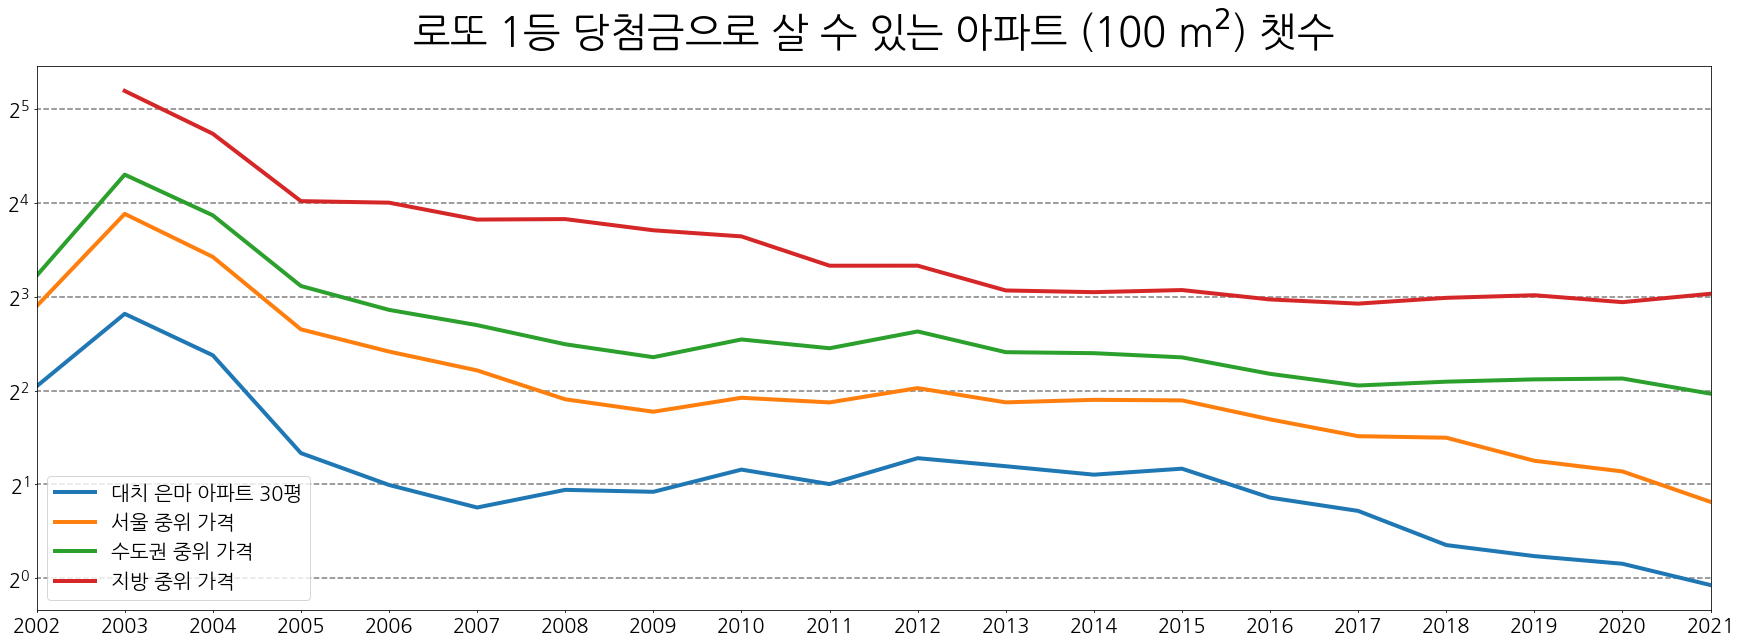

In [109]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 

nanum_gothic = fm.FontProperties(fname='NanumGothic.ttf').get_name()
matplotlib.rc('font',family=nanum_gothic)

plt.figure(figsize=(30,10))

# Eunma
#plt.plot(range(2006,2022), Eunma/Lprize[4:])
plt.plot(range(2002,2022), Lprize/Eunma, linewidth=4)
plt.plot(range(2002,2022), Lprize/Apt_year_0, linewidth=4)
plt.plot(range(2002,2022), Lprize/Apt_year_1, linewidth=4)
plt.plot(range(2003,2022), Lprize[1:]/Apt_year_2, linewidth=4)

# horizontal lines
for i in [1.0, 2.0, 4.0, 8.0, 16.0, 32,0]:
    plt.hlines(i, 2001, 2022, colors='gray', linestyles='--')
    #plt.hlines(i*1.15, 2001, 2022, colors='lightgray', linestyles='--')
    #plt.hlines(i*1.30, 2001, 2022, colors='lightgray', linestyles='--')
    #plt.hlines(i*1.45, 2001, 2022, colors='lightgray', linestyles='--')

plt.xlim([2002,2021])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks([1, 2, 4, 8, 16], fontsize=20, backgroundcolor='white')
plt.yscale('log', basey=2)
plt.legend(['대치 은마 아파트 30평', '서울 중위 가격', '수도권 중위 가격', '지방 중위 가격'], loc='lower left', fontsize=20)

plt.title('로또 1등 당첨금으로 살 수 있는 아파트 (100 m$^2$) 챗수', fontsize=40, backgroundcolor='white', pad=20)
plt.show()

### 경제적 자유 시뮬레이션
- 2020년 임금 상승률 1.5% https://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=369158

모든 금액을 다 예금에 넣어두고, 계속 지출만 하고 몇 년을 버틸 수 있을까? (매달 지출액 = 4인 가구 평균 수입)

In [108]:
def compute_laborfree_year(Hincome_year, apartment=[], start_year=2002):
    k_labor_free = []
    for year in range(start_year, 2022):
        # start from Lotto 1-rank prize
        remain_money = Lprize[year-2002]
        
        # buy the apartment
        if(len(apartment) > 0):
            remain_money -= apartment[year-start_year]
    

        free_year = 0
        if(remain_money > 0):
            cont_condition = True
            offset = (year-2002)
        else:
            cont_condition = False

        while cont_condition:
            if free_year + offset < len(R):
                interest_r = R[free_year+offset]
            else:
                interest_r = R[-1]

            remain_money = remain_money * (1.0+interest_r/100)

            #print(free_year, year, offset, free_year+offset)
            if (free_year+offset) < len(Hincome_year):
                spending = Hincome_year[free_year+offset]
            else:
                spending = Hincome_year[-1]*((1.015)**(free_year-len(Hincome_year)))        

            if remain_money >= spending:
                remain_money = remain_money - spending
                free_year += 1
            else:
                cont_condition = False

        k_labor_free.append(float(free_year) + (remain_money / spending))
    return k_labor_free

# with apartment
labor_free_eunma = compute_laborfree_year(Hincome_year_2member, Eunma, 2002)
labor_free_seoul = compute_laborfree_year(Hincome_year_2member, Apt_year_0, 2002)
labor_free_metro = compute_laborfree_year(Hincome_year_2member, Apt_year_1, 2002)
labor_free_rural = compute_laborfree_year(Hincome_year_2member, Apt_year_2, 2003)

# with no apartment
labor_free_year = compute_laborfree_year(Hincome_year)
labor_free_year_2member = compute_laborfree_year(Hincome_year_2member)
labor_free_year_avg = compute_laborfree_year(Hincome_avg_year)

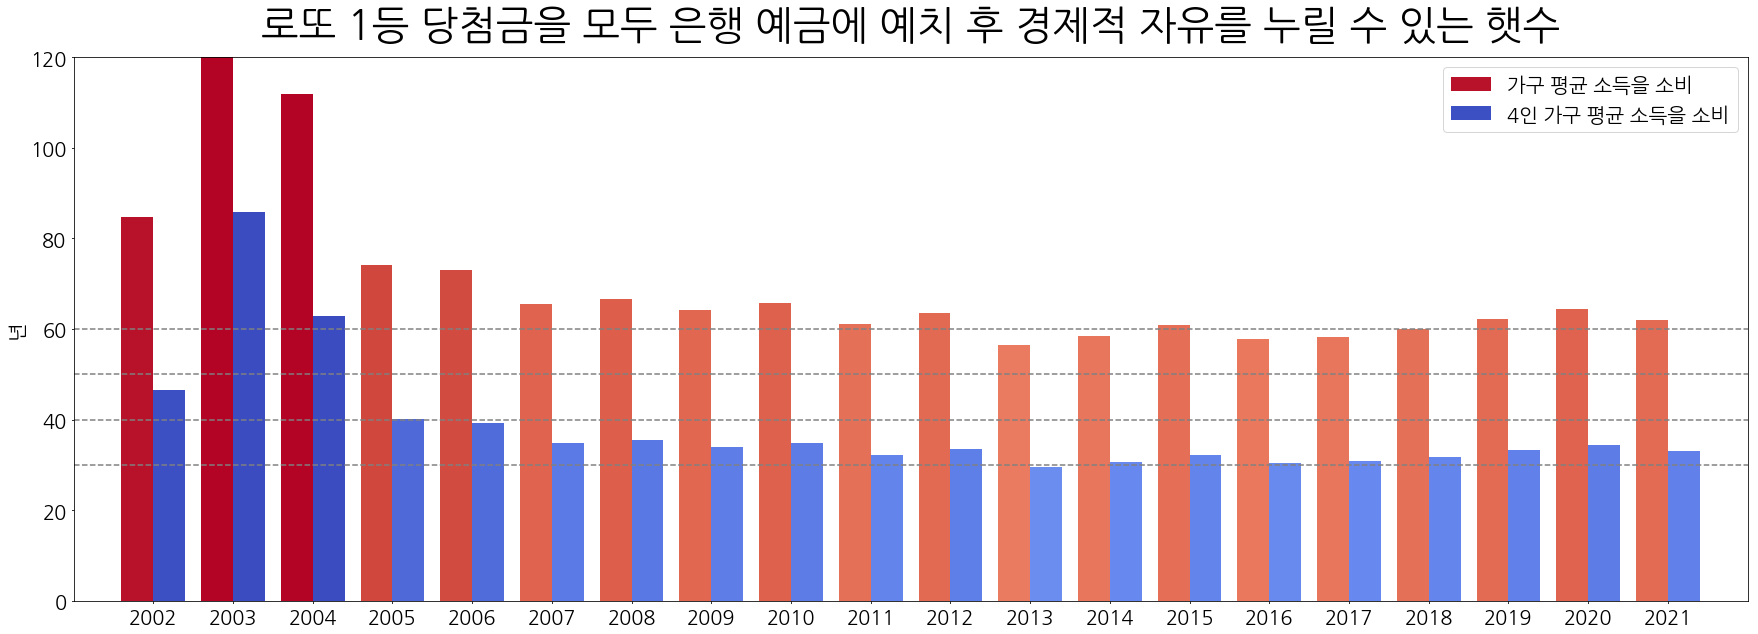

In [187]:
plt.figure(figsize=(30,10))

bar = np.array([i for i in range(2002,2022)])
width = 0.4

# 4 members
plt.bar(bar - width/2, labor_free_year_2member, width, color=my_cmap(rescale_red(labor_free_year_avg)))

plt.bar(bar + width/2, labor_free_year, width, color=my_cmap(rescale_blue(labor_free_year)))


plt.legend(['2인 가구 평균 소득을 소비', '4인 가구 평균 소득을 소비'], fontsize=20)
# horizontal lines
for val in [30, 40, 50, 60]:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dashed')

plt.xlim([2001,2022])
plt.ylim([0, 120])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(fontsize=20, backgroundcolor='white')
plt.ylabel('년', fontsize=20)
plt.title('로또 1등 당첨금을 모두 은행 예금에 예치 후 경제적 자유를 누릴 수 있는 햇수', fontsize=40, backgroundcolor='white', pad=20)
plt.show()

### K-경제적 자유 시뮬레이션
아파트 한 채를 바로 사고, 나머지는 다 예금에 집어넣으면 몇 년을 버틸 수 있을까?

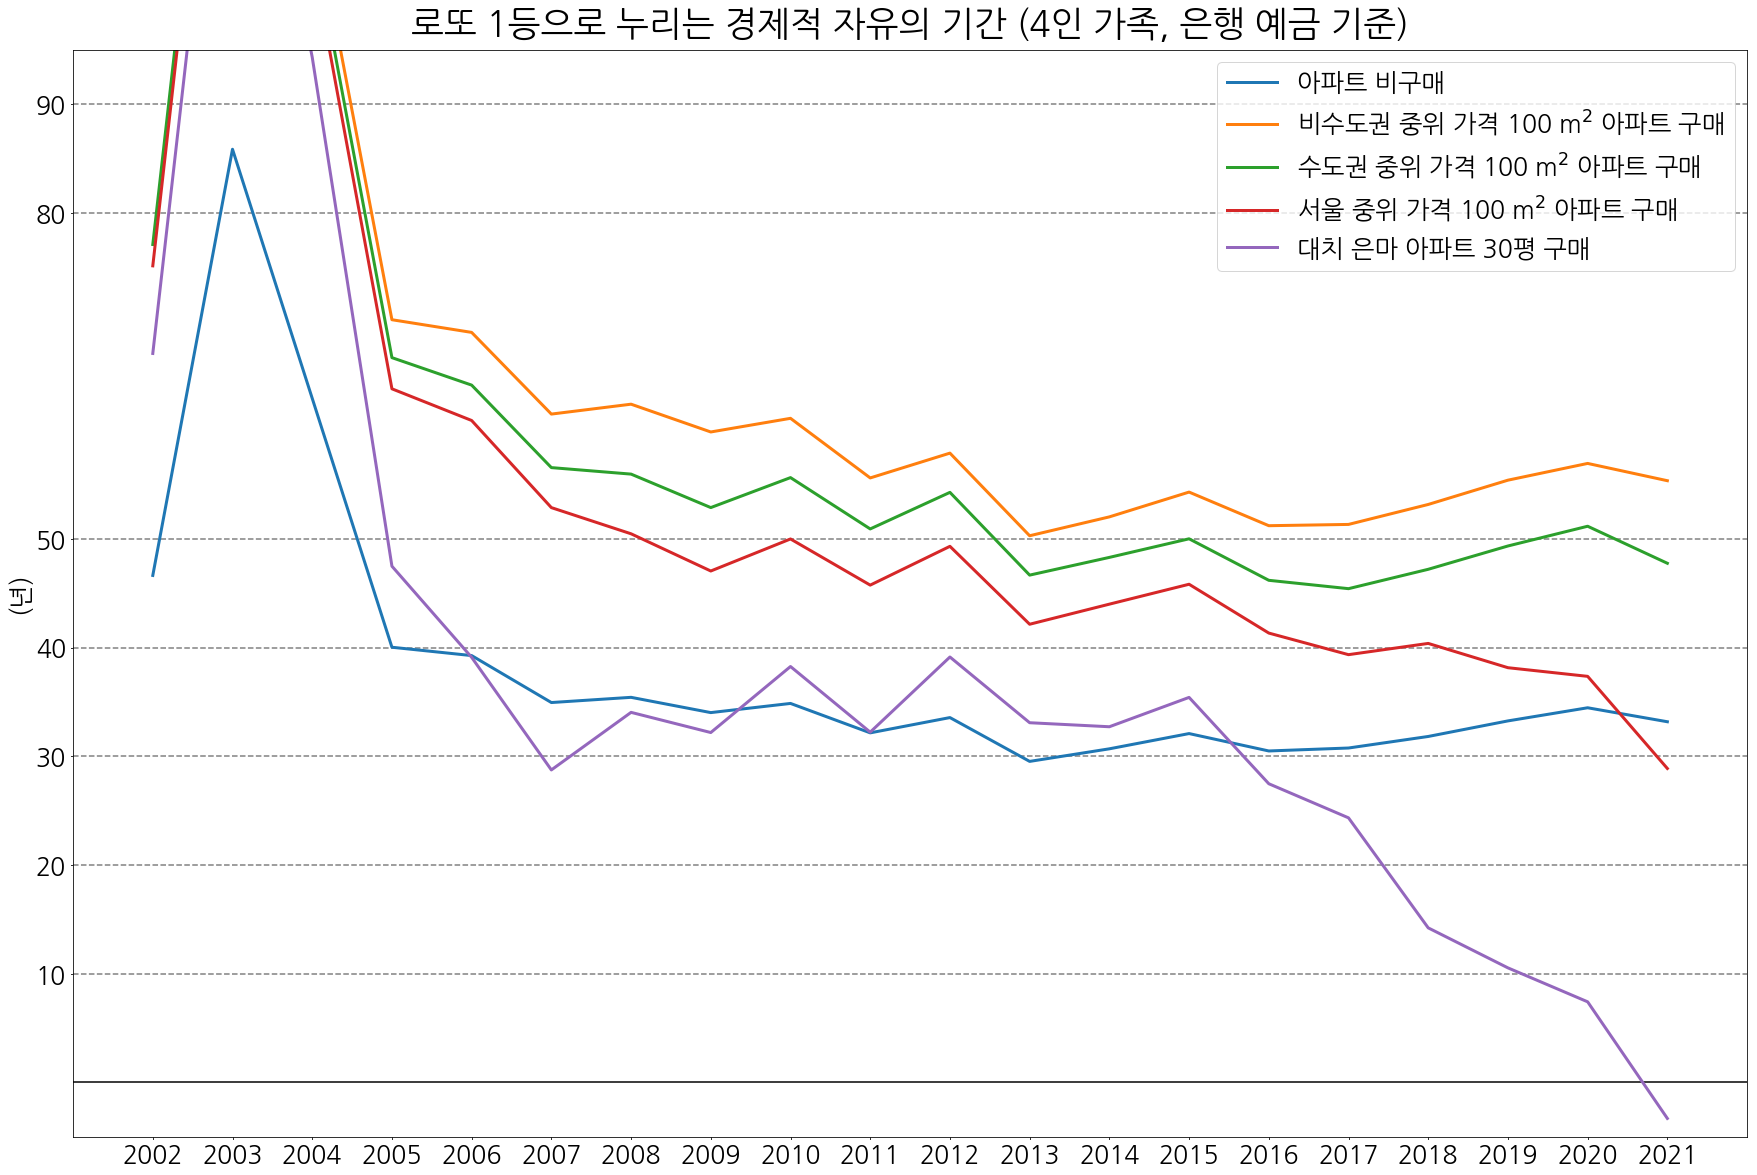

In [107]:
plt.figure(figsize=(30,20))

# Eunma
#plt.bar(range(2002,2022), k_labor_free, color=my_cmap(rescale(k_labor_free)))
plt.plot(range(2002,2022), labor_free_year_4member, linewidth=3)
plt.plot(range(2003,2022), labor_free_rural, linewidth=3)
plt.plot(range(2002,2022), labor_free_metro, linewidth=3)
plt.plot(range(2002,2022), labor_free_seoul, linewidth=3)
plt.plot(range(2002,2022), labor_free_eunma, linewidth=3)

# horizontal lines
plt.hlines(90.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(80.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(50.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(40.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(30.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(20.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(10.0, 2001, 2022, colors='gray', linestyles='dashed')
plt.hlines(0.0, 2001, 2022, colors='black', linestyles='-')

plt.xlim([2001,2022])
plt.ylim([-5, 95])
plt.xticks(range(2002,2022), fontsize=25, backgroundcolor='white')
plt.yticks([10, 20, 30, 40, 50, 80, 90], fontsize=25, backgroundcolor='white')
#plt.yscale('log', basey=2)

plt.legend(['아파트 비구매', '비수도권 중위 가격 100 m$^2$ 아파트 구매', '수도권 중위 가격 100 m$^2$ 아파트 구매', '서울 중위 가격 100 m$^2$ 아파트 구매', '대치 은마 아파트 30평 구매'], loc='upper right', fontsize=25)

plt.ylabel('(년)', fontsize=25)
#plt.suptitle('경제적 자유 지표', fontsize=40)
plt.title('로또 1등으로 누리는 경제적 자유의 기간 (4인 가족, 은행 예금 기준)', fontsize=35, backgroundcolor='white', pad=15)
plt.show()

예외적으로 당첨금이 높았던 2003~4년을 제외하고 보면, 노동 소득에 비례해서도 로또 1등 당첨금은 크게 달라졌습니다. 여전히 로또 1등 당첨 금액은 "4인 가구의 평균 소득"을 33.7년 동안 소비만 해야 쓸 수 있을 정도로 큰 금액입니다. 다만, 자산 가격이 많이 상승해서 아파트를 산다면 직장을 그만두기 어렵습니다. 2005년에는 서울 아파트를 구매하고도 35년의 경제적 자유를 누릴 수 있습니다. 2021년 서울 부동산 구매 시 15년 정도 밖에 경제적 자유를 누리지 못합니다. 대치 은마 아파트 30평의 2021년 매매가는 로또 당첨 금액을 넘어섰습니다. 강남 지역 아파트 한 채 보유가 로또가 된 세상입니다.

### three figures

/home/tackgeun/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


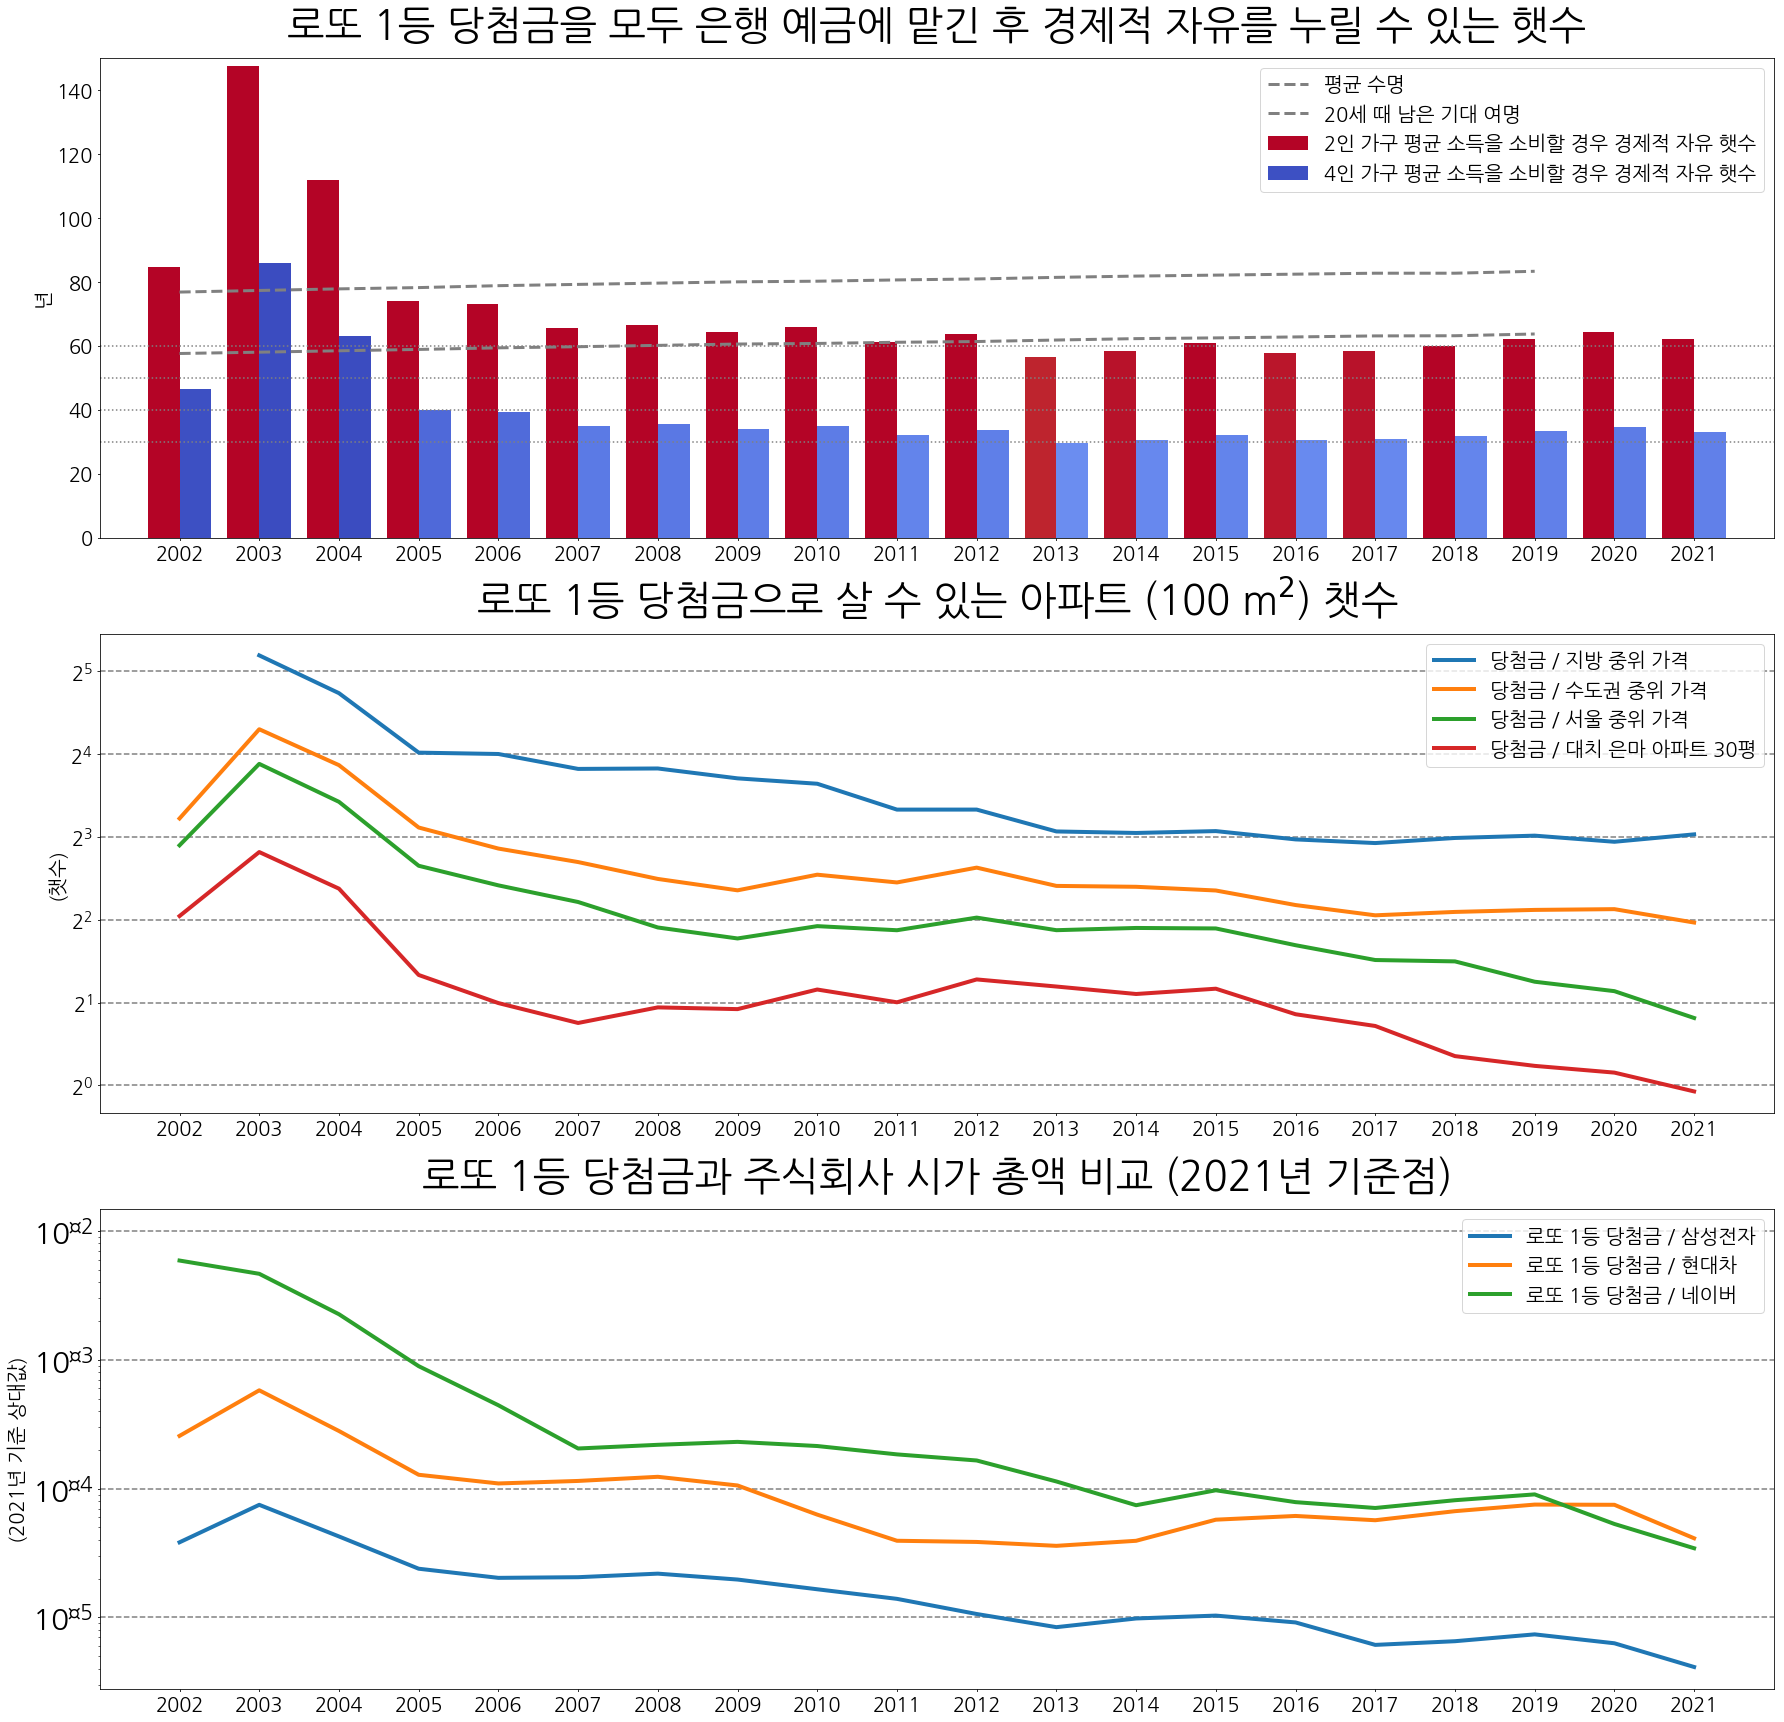

In [192]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 

nanum_gothic = fm.FontProperties(fname='NanumGothic.ttf').get_name()
matplotlib.rc('font',family=nanum_gothic)

plt.figure(figsize=(30,30))

ax = plt.subplot(3, 1, 1)

ax.plot(range(2002,2020), expected_life, '--', linewidth=3, color='gray')
ax.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
#ax.plot(report_year, fresh_age, '--', linewidth=3, color='gray')

plt.bar(bar - width/2, labor_free_year_2member, width, color=my_cmap(rescale_red(labor_free_year_2member)))
#plt.bar(bar , labor_free_year_avg, width/3, color=my_cmap(rescale_red(labor_free_year_avg)))
plt.bar(bar + width/2, labor_free_year, width, color=my_cmap(rescale_blue(labor_free_year)))

ax.legend(['평균 수명', '20세 때 남은 기대 여명', '2인 가구 평균 소득을 소비할 경우 경제적 자유 햇수', '4인 가구 평균 소득을 소비할 경우 경제적 자유 햇수'], fontsize=20, loc='upper right')
# horizontal lines
for val in [30, 40, 50, 60]:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

# ax.bar(range(2002,2022), labor_free_year, color=my_cmap(rescale(labor_free_year)))
# # horizontal lines
# ax.hlines(40.0, 2001, 2022, colors='gray', linestyles='dashed')
# ax.hlines(30.0, 2001, 2022, colors='gray', linestyles='dashed')

plt.xlim([2001,2022])
plt.ylim([0, 150])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(fontsize=20, backgroundcolor='white')
plt.ylabel('년', fontsize=20)
ax.set_title('로또 1등 당첨금을 모두 은행 예금에 맡긴 후 경제적 자유를 누릴 수 있는 햇수', fontsize=40, backgroundcolor='white', pad=20)

ax = plt.subplot(3, 1, 2)
# Eunma
#plt.plot(range(2006,2022), Eunma/Lprize[4:])
ax.plot(range(2003,2022), Lprize[1:]/Apt_year_2, linewidth=4)
ax.plot(range(2002,2022), Lprize/Apt_year_1, linewidth=4)
ax.plot(range(2002,2022), Lprize/Apt_year_0, linewidth=4)
ax.plot(range(2002,2022), Lprize/Eunma, linewidth=4)

# horizontal lines
for i in [1.0, 2.0, 4.0, 8.0, 16.0, 32,0]:
    ax.hlines(i, 2001, 2022, colors='gray', linestyles='--')
    #plt.hlines(i*1.15, 2001, 2022, colors='lightgray', linestyles='--')
    #plt.hlines(i*1.30, 2001, 2022, colors='lightgray', linestyles='--')
    #plt.hlines(i*1.45, 2001, 2022, colors='lightgray', linestyles='--')

plt.xlim([2001,2022])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks([1, 2, 4, 8, 16], fontsize=20, backgroundcolor='white')
plt.yscale('log', basey=2)
plt.ylabel('(챗수)', fontsize=20)
#ax.legend(['당첨금 / 대치 은마 아파트 30평', '당첨금 / 서울 중위 가격', '당첨금 / 수도권 중위 가격', '당첨금 / 지방 중위 가격'], loc='upper right', fontsize=20)
ax.legend(['당첨금 / 지방 중위 가격', '당첨금 / 수도권 중위 가격', '당첨금 / 서울 중위 가격', '당첨금 / 대치 은마 아파트 30평'], loc='upper right', fontsize=20)
ax.set_title('로또 1등 당첨금으로 살 수 있는 아파트 (100 m$^2$) 챗수', fontsize=40, backgroundcolor='white', pad=20)

ax = plt.subplot(3, 1, 3)

# KOSPI
#Lotto_KOSPI = Lprize/KOSPI
#Lotto_KOSPI = Lotto_KOSPI / Lotto_KOSPI[-1]
#ax.plot(range(2002, 2022), Lotto_KOSPI, linewidth=4)
#ax.plot(range(2002, 2022), Lotto_SNP500, linewidth=4) # 환율을 넣어야 함

#legends = ['로또 1등 당첨금 / 코스피 지수 (2021년을 1로 기준)']
legends = []
for _k in ['삼성전자', '현대차', '네이버']:
    if(_k == '셀트리온'):
        _K = Lprize[3:] / np.array(company_stock[_k])
        #_K = _K / _K[-1]
        ax.plot(range(2005, 2022), _K, linewidth=4)        
    else:
        _K = Lprize / np.array(company_stock[_k])
        #_K = _K / _K[-1]
        ax.plot(range(2002, 2022), _K, linewidth=4)    
    legends.append('로또 1등 당첨금 / %s' %_k)
ax.legend(legends, loc='upper right', fontsize=20)

# horizontal lines
for i in [10.0**-2, 10.0**-3, 10.0**-4, 10.0**-5]:
    ax.hlines(i, 2001, 2022, colors='gray', linestyles='--')

ax.set_title('로또 1등 당첨금과 주식회사 시가 총액 비교 (2021년 기준점)', fontsize=40, backgroundcolor='white', pad=20)
plt.xlim([2001,2022])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(fontsize=30, backgroundcolor='white')
plt.ylabel('(2021년 기준 상대값)', fontsize=20)
plt.yscale('log', basey=10)

plt.show()

### 우리는 경제적 자유를 누릴 수 있다, 다만

In [450]:
len(range(2002,2021)), len(inv_inf_rate_mult), len(Lprize), len(Apt_year_0), len(Apt_year_2), len(Hincome_year)

(19, 19, 20, 20, 19, 17)

In [542]:
len(inv_inf_rate_mult[1:])

18

ValueError: operands could not be broadcast together with shapes (19,) (18,) 

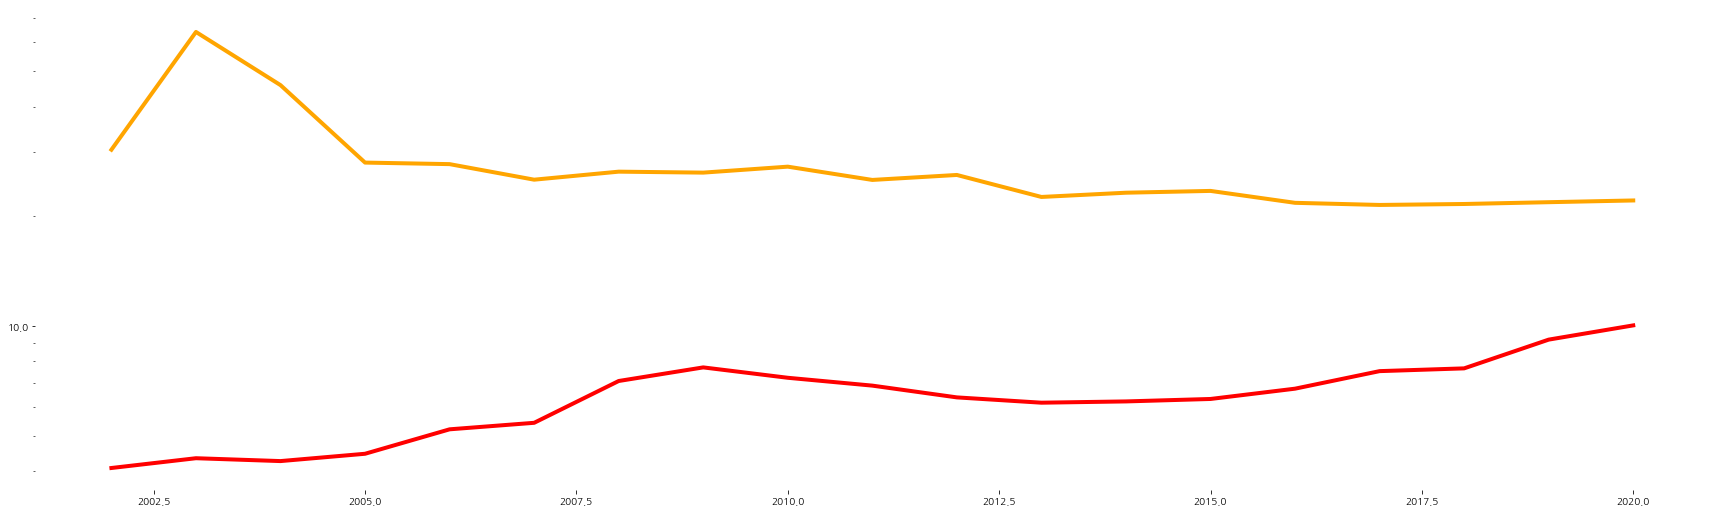

In [543]:
fig = plt.figure(figsize=(30,30))

###########################
# 1. 로또 1등 당첨금의 환산 가치
###########################

ax = plt.subplot(3, 1, 1)
plt.yscale('log', basey=10)
ax.yaxis.set_major_formatter(ScalarFormatter())

for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

# solid lines for converted price at 2020
legend1_text = ['로또 1등 당첨액', '서울 중위 가격 아파트 (100 m$^2$)', '지방 중위 가격 아파트 (100 m$^2$)', '4인 가구 소득']
s1, = plt.plot(range(2002,2021), Lprize[0:-1] * inv_inf_rate_mult/10000, linewidth=4, color='orange')
s2, = plt.plot(range(2002,2021), Apt_year_0[0:len(inv_inf_rate_mult)] * inv_inf_rate_mult/10000, linewidth=4, color='red')
s3, = plt.plot(range(2003,2021), Apt_year_2[0:len(inv_inf_rate_mult)] * inv_inf_rate_mult[1:]/10000, linewidth=4, color='magenta')
s4, = plt.plot(range(2002,2019), Hincome_year * inv_inf_rate_mult[0:len(Hincome_year)]/10000, linewidth=4, color='g')
s_lines = [s1,s2,s3,s4]

# dashed lines for price at each year
legend2_text = ['로또 1등 당첨액', '서울 중위 가격 아파트 (100 m$^2$)', '지방 중위 가격 아파트 (100 m$^2$)', '4인 가구 소득']
d1, = plt.plot(range(2002,2022), Lprize/10000, '--', linewidth=2, color='orange')
d2, = plt.plot(range(2002,2022), Apt_year_0/10000, '--', linewidth=2, color='red')
d3, = plt.plot(range(2003,2022), Apt_year_2/10000, '--', linewidth=2, color='magenta')
d4, = plt.plot(range(2002,2019), Hincome_year/10000, '--', linewidth=2, color='g')
#d5, = plt.plot(range(2002,2019), Hincome_year_2member/100, '--', linewidth=2, color='cyan')
d_lines = [d1,d2,d3,d4]

# horizontal lines
yticks_list = [0.4, 0.8, 1, 2, 5, 10, 20, 40, 80]
for i in yticks_list:
    plt.hlines(i, 2001, 2022, colors='gray', linestyles='--')

plt.xlim(2001,2028)
plt.ylim(2*10**-1, 10**2)
legend1_1 = ax.legend(s_lines, legend1_text, fontsize=20, title_fontsize=25, title='2020년 환산 가치 (소비자물가지수)',
                    loc='upper right')#, bbox_to_anchor=(1.25, 1))
legend1_2 = ax.legend(d_lines, legend2_text, fontsize=20, title_fontsize=25, title='해당연도 화폐 가치',
                    loc='center right', bbox_to_anchor=(1, 0.4))

plt.gca().add_artist(legend1_1)

plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(yticks_list, fontsize=20)
plt.ylabel('(억)', fontsize=20)
#plt.title('로또 1등 당첨금의 가치는 하락세, 아파트 가격와 평균 연봉은 상승세', fontsize=40, pad=15)
plt.title('로또 1등 당첨금, 아파트 가격, 평균 연봉의 현재 가치', fontsize=40, pad=15)
#ax.yaxis.set_minor_formatter(ScalarFormatter())

#####################################
# 2. 가족 구성원 숫자에 따른 경제적 자유 햇수
#####################################

ax = plt.subplot(3, 1, 2)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

    
f1 = plt.bar(bar - width/2, labor_free_year_2member, width, color=my_cmap(rescale_blue(labor_free_year_2member)))
f2 = plt.bar(bar + width/2, labor_free_year, width, color=green_cmap(rescale_green(labor_free_year)))
labor_free_text = ['2인 가구 평균 소득을 소비할 경우', '4인 가구 평균 소득을 소비할 경우']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='gray')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명']

legend2_1 = ax.legend([f1, f2], labor_free_text, fontsize=20, title='당첨금 전체 은행 예금 시 경제적 자유 햇수', title_fontsize=25,
                      loc='upper right',)
legend2_2 = ax.legend([e1, e2], life_text, fontsize=20, loc='center right', bbox_to_anchor=(1.0,0.65))

# horizontal lines
for val in [30, 60, 90, 120, 150]:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2028])
plt.ylim([0, 150])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks([30, 60, 90, 120, 150], fontsize=20, backgroundcolor='white')
plt.ylabel('(년)', fontsize=20)
#ax.set_title('로또 1등에 당첨되면, 아직까지도 2인 가구는 소비만 하면서 경제적 자유를 누릴 수 있다!', fontsize=40, backgroundcolor='white', pad=20)
ax.set_title('로또 1등 당첨시, 2인 및 4인 가구의 경제적 자유 햇수', fontsize=40, backgroundcolor='white', pad=20)

##################################
# 3. 아파트 구매 여부에 따른 경제적 자유 햇수
##################################

ax = plt.subplot(3, 1, 3)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

a1 = plt.bar(bar - width/1.5, labor_free_year_2member, width/3*1.9, color=my_cmap(rescale_blue(labor_free_year_2member)))
a2 = plt.bar(bar[1:len(bar)], labor_free_rural, width/3*1.9, color=magenta_cmap(rescale_magenta(labor_free_year)))
a3 = plt.bar(bar + width/1.5, labor_free_seoul, width/3*1.9, color=my_cmap(rescale_red(labor_free_year)))
labor_free_text = ['아파트 비구매', '지방 (비수도권) 아파트 100 m$^2$', '서울 아파트 100 m$^2$']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='gray')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명']

legend2_1 = ax.legend([a1, a2, a3], labor_free_text, fontsize=20, title='아파트 구매 후 남은 금액을 예금 시 2인 가구의 경제적 자유 햇수', title_fontsize=25,
                      loc='upper right',)
legend2_2 = ax.legend([e1, e2], life_text, fontsize=20, loc='center right', bbox_to_anchor=(1.0,0.57))

# horizontal lines
for val in [30, 40, 50, 60]:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2028])
plt.ylim([0, 150])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(fontsize=20, backgroundcolor='white')
plt.ylabel('(년)', fontsize=20)
ax.set_title('아파트 구매 시, 2인 가구의 경제적 자유 햇수', fontsize=40, backgroundcolor='white', pad=20)
plt.show()

In [536]:
plt.tight_layout()
fig.savefig('compiled_image.png')

<Figure size 432x288 with 0 Axes>

로또 1등이 당첨되면 아파트를 사고 회사에 사표를 낼 상상들을 합니다. 하지만 이제는 상상조차 불가능해보입니다. 로또 1등에 당첨되어도 아파트는 구매하지 않고, 2인 가구인 경우에만 경제적 자유를 누릴 수 있습니다. 과거 대비 삶의 비용이 크게 오른 현재입니다.